In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm


print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

##설치된 폰트보기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# ttf 폰트 전체개수
print(len(font_list))

# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

버전:  3.0.2
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Administrator\.matplotlib
캐시 위치:  C:\Users\Administrator\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
336
0


########도,시별#########
관할경찰서1
강원도        55
경기도      1162
경상남도      125
경상북도      347
광주광역시     104
대구광역시    1033
대전광역시     162
부산광역시     197
서울특별시    2312
울산광역시     128
인천광역시     106
전라남도       27
전라북도      121
충청남도       41
충청북도      145
Name: 합계, dtype: int64

########구,시별#########
관할경찰서1  관할경찰서2
강원도     원주시        35
        춘천시        20
경기도     고양시       132
        광명시        27
        구리시        17
        군포시        14
        남양주시       18
        동두천시       15
        부천시       304
        성남시        33
        수원시       168
        시흥시        80
        안산시       161
        안양시        33
        오산시        35
        용인시        18
        의정부시       23
        파주시        11
        평택시        39
        하남시        34
경상남도    거제시        33
        김해시        62
        창원시        15
        통영시        15
경상북도    경산시        40
        경주시        85
        문경시        18
        상주시        91
        영주시        24
        포항시        89
                 ... 
서울특별시   도봉구       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

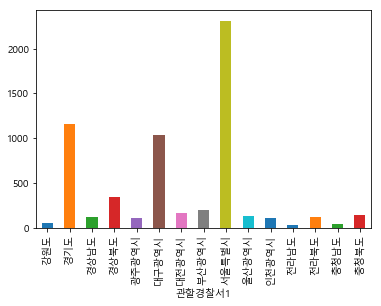

In [7]:
#import matplotlib.pyplot as plt
od = pd.read_csv("bycycle.csv", encoding = "EUC-KR")
#교통사고정보를 이용하여 각각의 시도별 발생건수, 사상자수, 사망자수, 중상사주, 경상자수, 부상신고자수 합계를 구하고
#그래프로 출력하시오. (pandas or numpy사용)
# 관할 경잘서 기준 
# 시도별

#################함수1. 문자열에서 숫자 제거하기
def remove_number(str1):
    li = list(str1)
    num=[]
    for a in range(0,len(li)):         #숫자있으면 지워버리기
        if ( li[a].isnumeric() ):
            num.append(li[a])
    #숫자제거
    if(len(num)>0):                      
        for b in range(0,len(num)):
            li.remove(num[b])    
            
    #문자열로 리턴  
    res = "".join(li)
    return (res)                
#################0.원하는 것만 담아서 저장
m1 = od[['스팟코드', '관할경찰서','발생건수','사상자수','중상자수','경상자수','부상신고자수']]

#################1.시도 나누기
m1["스팟코드"] = m1["스팟코드"].apply(lambda e: int(e/10000))
m1["관할경찰서1"] = m1["관할경찰서"].apply(lambda e: e.split()[0])
m1["관할경찰서2"] = m1["관할경찰서"].apply(lambda e: remove_number(e.split()[1]))
#print(m1)

#################2. 행별 합계구하기
m1["합계"] = m1.loc[0:, ['발생건수','사상자수','중상자수','경상자수','부상신고자수']].sum(axis = 1)

#################3. 원하는 값만 뽑기
m2 = m1[['스팟코드', '관할경찰서1', '관할경찰서2', '합계']]
#print(m2)

#################4. 합계
res1 = m2.groupby('관할경찰서1')['합계'].sum()
print("########도,시별#########")
print(res1)
##print(res['관할경찰서1'])

print("\n########구,시별#########")
res2 = m2.groupby(['관할경찰서1','관할경찰서2'])['합계'].sum()
print(res2)


#################5. 차트 그리기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

res1.plot.bar()
#res1.plot.line()
